# Nature of Data:
The dataset used for this analysis contains hourly bicycle counts on Seattle's Fremont Bridge. These counts are collected from an automated bicycle counter installed in late 2012. The counter has inductive sensors on the east and west sidewalks of the bridge, allowing it to track the number of bicycles passing by in each direction.

## Significance:
The dataset provides valuable insights into bicycle usage patterns, which can inform urban planning, transportation policy, and infrastructure development in Seattle.
Analyzing the bicycle counts over time can help identify trends and seasonal variations in bicycle usage, which may be influenced by factors such as weather conditions, time of day, and events happening in the city.
Understanding bicycle usage patterns can also contribute to efforts aimed at promoting sustainable transportation options and improving the overall livability of urban areas.

## Analysis:
### Total Bicycle Counts by Hour of the Day:

This analysis examines the variation in bicycle counts throughout the day, providing insights into peak hours of bicycle activity.
The line graph visualizes the total bicycle counts by hour of the day from January 2024 until the current date.
Annotations on the graph indicate the specific count for each hour, allowing for easy interpretation of the data.

### Total Bicycle Counts by Day of the Week:

This analysis explores the distribution of bicycle counts across different days of the week.
The bar graph illustrates the total bicycle counts by day of the week (e.g., Monday, Tuesday, etc.) from January 2024 until the current date.
Annotations on the bars display the count for each day, enabling comparison between weekdays and weekends and identification of any notable patterns or trends.

## Conclusion:
By analyzing the bicycle counts on Seattle's Fremont Bridge, we gain valuable insights into the city's bicycle usage patterns.
This analysis contributes to our understanding of urban mobility and provides information that can be used to support efforts aimed at promoting sustainable transportation options and improving the overall quality of life in Seattle


<Figure size 1000x600 with 0 Axes>

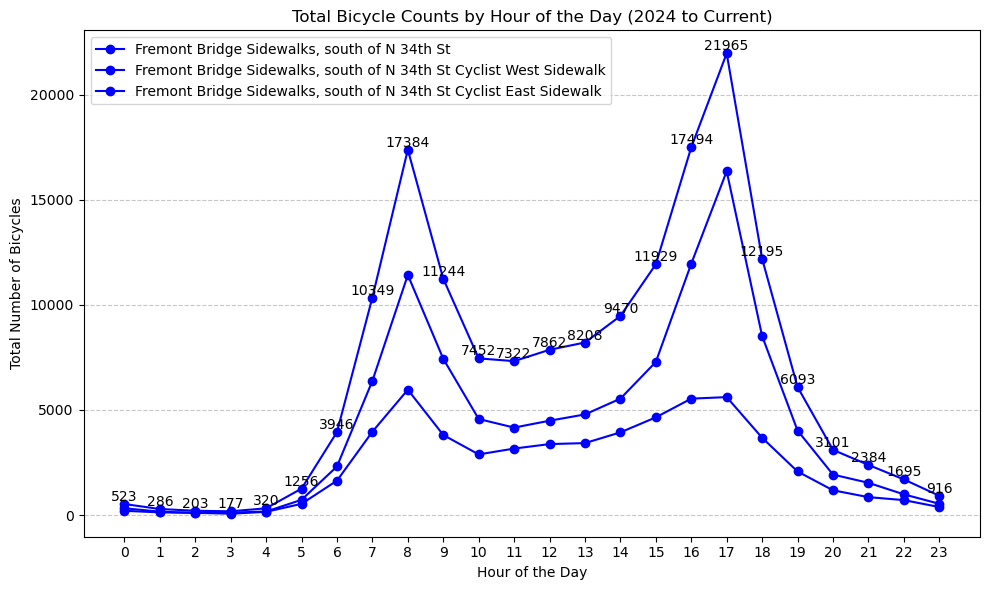

<Figure size 1000x600 with 0 Axes>

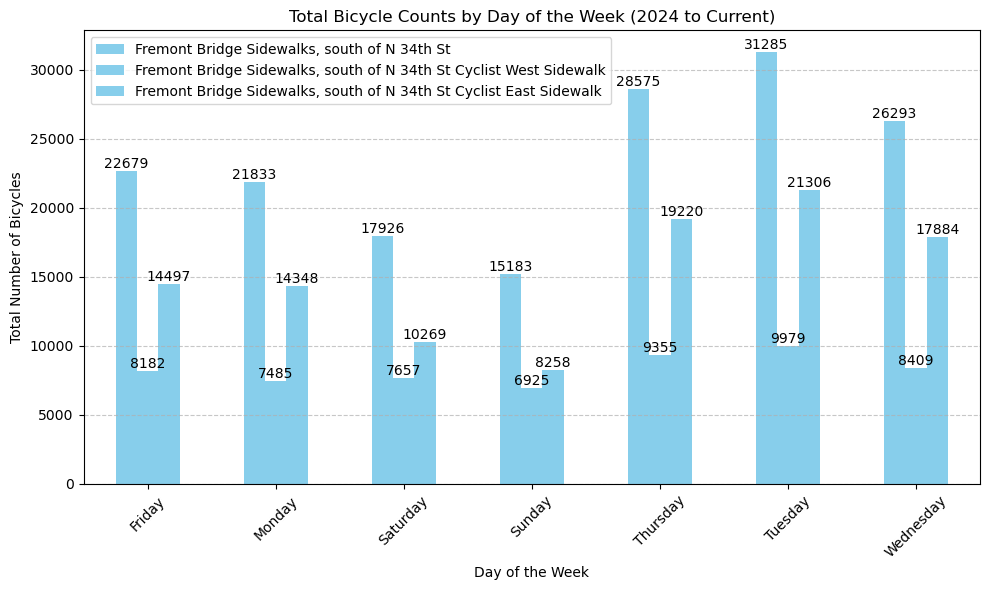

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Downloading the dataset
url = "https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD"

# Read the CSV file into a DataFrame
bike_counts = pd.read_csv(url, index_col='Date', parse_dates=True)

# Filter data for the period from January 2024 until the current date
start_date = '2024-01-01'
end_date = pd.Timestamp.now().strftime('%Y-%m-%d')
bike_counts_2024_to_current = bike_counts.loc[start_date:end_date]

# Resample the data to hourly counts
hourly_counts = bike_counts_2024_to_current.resample('H').sum()

# Extract the hour of the day
hourly_counts['Hour'] = hourly_counts.index.hour

# Group by hour of the day and sum the counts for all available columns
hourly_counts_by_hour = hourly_counts.groupby('Hour').sum()

# Plotting the line graph for total bicycle counts by hour of the day
plt.figure(figsize=(10, 6))
hourly_counts_by_hour.plot(kind='line', figsize=(10, 6), marker='o', color='blue')
plt.title('Total Bicycle Counts by Hour of the Day (2024 to Current)')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Number of Bicycles')
plt.xticks(range(24))
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate each point on the line graph with its count
for i, count in enumerate(hourly_counts_by_hour['Fremont Bridge Sidewalks, south of N 34th St']):
    plt.text(i, count, str(int(count)), ha='center', va='bottom')

plt.tight_layout()

# Plotting the bar graph for total bicycle counts by day of the week
plt.figure(figsize=(10, 6))
ax = bike_counts_2024_to_current.groupby(bike_counts_2024_to_current.index.day_name()).sum().plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Total Bicycle Counts by Day of the Week (2024 to Current)')
plt.xlabel('Day of the Week')
plt.ylabel('Total Number of Bicycles')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate each bar on the bar graph with its count
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.tight_layout()

plt.show()